### Fig. 3. Histograms of input variables and outputs.

#### 1. shape

Shape
0    0.558824
1    0.388235
2    0.052941
Name: count, dtype: float64


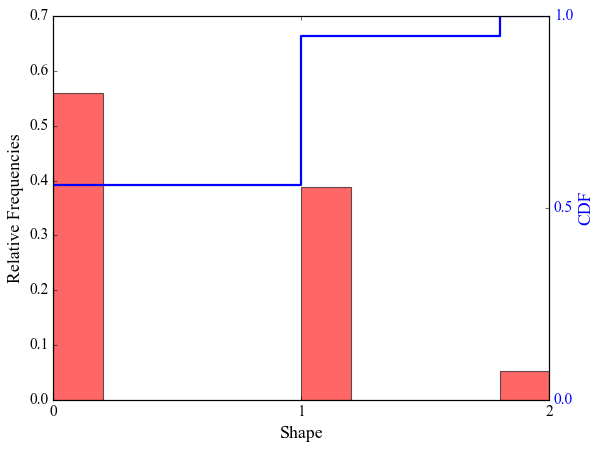

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 설정: 배경을 흰색, 글꼴을 Times New Roman으로 지정하고 기본 폰트 크기를 14로 설정
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14  # 기본 폰트 크기를 올림

# 2. 데이터 불러오기 (파일 경로를 본인 환경에 맞게 수정)
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)

# 3. "Shape" 열의 데이터를 추출
shape_data = data["Shape"]

# 4. 0, 1, 2 값에 대한 빈도와 상대빈도 계산
freq = shape_data.value_counts().sort_index()  # 값 0, 1, 2 순서 정렬
relative_freq = freq / len(shape_data)
print(relative_freq)  # 상대빈도 확인 (디버깅용)

# 5. 사용자 정의 축 범위 및 눈금 간격 설정
# x축 전체 범위를 0 ~ 2로 하고, 값 2의 막대를 오른쪽 끝에 붙이기 위해 막대 너비를 감안하여 배치
x_min, x_max = 0, 2
x_tick_interval = 0.5  # x축 눈금 간격 (예: 0.5 단위)

# 왼쪽 y축(상대빈도): 예시로 최대값에 0.1의 여유를 둠
y1_min, y1_max = 0, max(relative_freq.values) + 0.1
y1_tick_interval = 0.1  # 왼쪽 y축 눈금 간격

# 오른쪽 y축(CDF): CDF는 0~1 사이의 값을 가지므로
y2_min, y2_max = 0, 1
y2_tick_interval = 0.5  # 오른쪽 y축 눈금 간격

# 6. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 막대 너비 설정
bar_width = 0.2

# 각 값에 대해 x 위치 조정:
# 값 0, 1은 그대로, 값 2의 막대는 오른쪽 끝에 붙이기 위해 x 위치를 (2 - bar_width)로 설정
# -> x 위치는 [0, 1, 1.8]이 됨.
x_positions = []
for val in relative_freq.index:
    if val == 2:
        x_positions.append(2 - bar_width)
    else:
        x_positions.append(val)

# 6-1. 왼쪽 y축: 상대빈도를 bar plot으로 그리기
ax1.bar(
    x_positions,
    relative_freq.values,
    width=bar_width,
    align="edge",
    color="red",
    alpha=0.6,
    label="Relative Frequencies",
)
ax1.set_xlabel("Shape", fontsize=16)
ax1.set_ylabel("Relative Frequencies", fontsize=16)

# x축 범위 및 눈금 설정: x축 전체를 0~2로 표현하고, 눈금은 0, 1, 2로 표시
ax1.set_xlim(x_min, x_max)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels([0, 1, 2], fontsize=14)

# 왼쪽 y축 범위 및 눈금 설정
ax1.set_ylim(y1_min, y1_max)
ax1.set_yticks(np.arange(y1_min, y1_max + y1_tick_interval, y1_tick_interval))
ax1.tick_params(axis="y", labelsize=14)
ax1.tick_params(axis="x", labelsize=14)

# 6-2. 오른쪽 y축: CDF (누적 분포) 그리기
# 기존의 sns.ecdfplot 대신 CDF를 직접 계산하여, 데이터 값 2의 누적분포가 x=1.8에서 시작되도록 함
p0 = relative_freq.loc[0]
p1 = relative_freq.loc[1]
p2 = relative_freq.loc[2]
cum0 = p0
cum1 = p0 + p1
cum2 = p0 + p1 + p2  # cum2는 1이어야 함

# CDF 단계함수를 위한 x, y 좌표 설정
# - x=0부터 1까지는 누적확률이 cum0,
# - x=1부터 1.8까지는 누적확률이 cum1,
# - x=1.8부터 2까지는 1 (누적확률 cum2)
x_ecdf = [0, 1, 1.8, 2]
y_ecdf = [cum0, cum1, cum2, cum2]

# 오른쪽 y축에 step plot으로 CDF 그리기 (where='post' 사용)
ax2 = ax1.twinx()
ax2.step(x_ecdf, y_ecdf, where="post", color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)
ax2.set_ylim(y2_min, y2_max)
ax2.set_yticks(np.arange(y2_min, y2_max + y2_tick_interval, y2_tick_interval))

# 7. 제목 추가
plt.show()

#### 2. column_area

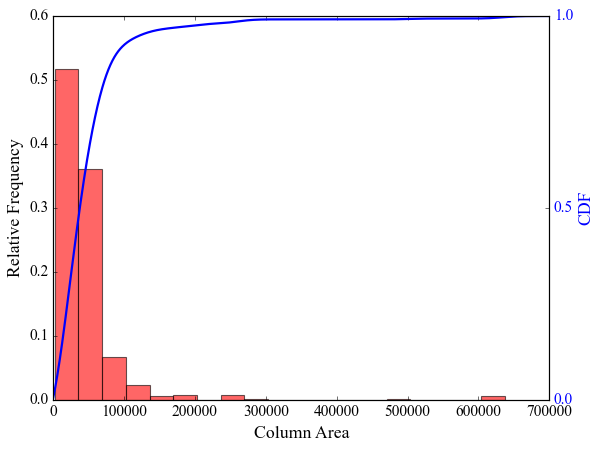

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 스타일 설정: 배경 흰색, 글꼴은 Times New Roman, 기본 폰트 크기 확대
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14

# 2. 데이터 불러오기: 엑셀 파일에서 'Column_area' 열의 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)
column_area_data = data["Column_area"]

# 3. 히스토그램(상대빈도) 계산을 위한 가중치 설정
weights = np.ones_like(column_area_data) / len(column_area_data)

# 4. 히스토그램의 구간(bins) 설정 (데이터 최소~최대값 사이 20구간)
bin_min = column_area_data.min()
bin_max = column_area_data.max()
bins = np.linspace(bin_min, bin_max, 20)

# 5. x축 범위를 0부터 700,000으로 고정
x_min = 0
x_max = 700000

# 히스토그램 상대빈도 계산 (y축 범위 설정용)
counts, bin_edges = np.histogram(column_area_data, bins=bins, weights=weights)
y1_min = 0
y1_max = 0.6

# 오른쪽 y축(CDF) 범위: 0 ~ 1
y2_min, y2_max = 0, 1

# 6. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 6-1. 왼쪽 y축: 히스토그램 그리기
ax1.hist(
    column_area_data,
    bins=bins,
    weights=weights,
    color="red",
    alpha=0.6,
    edgecolor="black",
    label="Relative Frequencies",
)
ax1.set_xlabel("Column Area", fontsize=16)
ax1.set_ylabel("Relative Frequency", fontsize=16)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y1_min, y1_max)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 6-2. 오른쪽 y축: 누적 KDE를 이용해 CDF 곡선 그리기
# x축을 0부터 700,000까지 균등하게 샘플링한 그리드 생성
grid_x = np.linspace(x_min, x_max, 1000)

# gaussian_kde로 KDE 계산
kde = gaussian_kde(column_area_data)
density = kde(grid_x)

# 누적 합을 계산 (사다리꼴 적분)하고 마지막 값을 1로 정규화
cum = np.cumsum(density) * (grid_x[1] - grid_x[0])
cum = cum / cum[-1]  # 정규화

# 오른쪽 y축에 CDF 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(grid_x, cum, color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.set_ylim(y2_min, y2_max)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)

# CDF y축 눈금을 0, 0.5, 1로 설정 (0.5 단위)
ax2.set_yticks(np.arange(0, 1.01, 0.5))

# 7. 그래프 제목 추가
plt.show()

#### 3. slab's_effective_depth

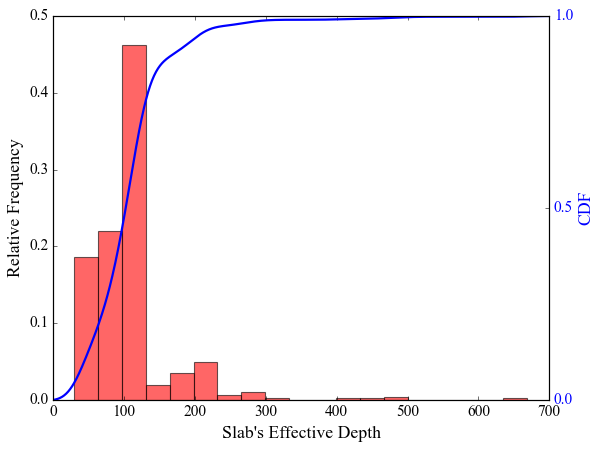

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 스타일 설정: 배경 흰색, 글꼴은 Times New Roman, 기본 폰트 크기 확대
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14

# 2. 데이터 불러오기: 엑셀 파일에서 "slab's_effective_depth" 열의 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)
slab_depth_data = data["slab's_effective_depth"]

# 3. 히스토그램(상대빈도) 계산을 위한 가중치 설정
weights = np.ones_like(slab_depth_data) / len(slab_depth_data)

# 4. 히스토그램의 구간(bins) 설정 (데이터의 최소~최대값 사이 20구간)
bin_min = slab_depth_data.min()
bin_max = slab_depth_data.max()
bins = np.linspace(bin_min, bin_max, 20)

# 5. x축 범위를 0부터 700으로 고정
x_min = 0
x_max = 700

# 히스토그램 상대빈도 계산 (y축 범위 설정용)
counts, _ = np.histogram(slab_depth_data, bins=bins, weights=weights)
y1_min = 0
y1_max = 0.5

# 오른쪽 y축(CDF) 범위: 0 ~ 1
y2_min, y2_max = 0, 1

# 6. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 6-1. 왼쪽 y축: 상대빈도를 히스토그램으로 표시
ax1.hist(
    slab_depth_data,
    bins=bins,
    weights=weights,
    color="red",
    alpha=0.6,
    edgecolor="black",
    label="Relative Frequencies",
)
ax1.set_xlabel("Slab's Effective Depth", fontsize=16)
ax1.set_ylabel("Relative Frequency", fontsize=16)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y1_min, y1_max)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 6-2. 오른쪽 y축: 누적 KDE를 이용해 부드러운 CDF 곡선 그리기
# x축 범위 내에서 균등하게 샘플링한 그리드 생성 (0~700)
grid_x = np.linspace(x_min, x_max, 1000)
# gaussian_kde로 밀도 추정
kde = gaussian_kde(slab_depth_data)
density = kde(grid_x)
# 사다리꼴 적분으로 누적합 계산 후 마지막 값으로 나눠 정규화 (마지막 값이 1이 됨)
cum = np.cumsum(density) * (grid_x[1] - grid_x[0])
cum = cum / cum[-1]

# 오른쪽 y축에 CDF 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(grid_x, cum, color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.set_ylim(y2_min, y2_max)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)
# CDF y축 눈금을 0, 0.5, 1로 설정
ax2.set_yticks(np.arange(0, 1.01, 0.5))

plt.show()

#### 4. fc

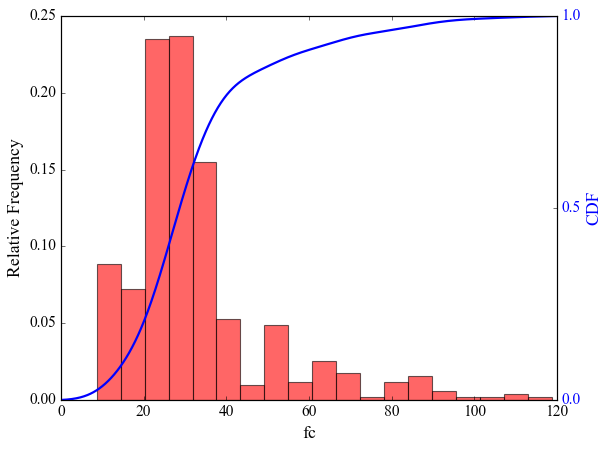

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 스타일 설정: 배경 흰색, 글꼴은 Times New Roman, 기본 폰트 크기 확대
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14

# 2. 데이터 불러오기: 엑셀 파일에서 "fc" 열의 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)
fc_data = data["fc"]  # 엑셀 파일에 "fc" 열이 있다고 가정합니다.

# 3. 히스토그램(상대빈도) 계산을 위한 가중치 설정
weights = np.ones_like(fc_data) / len(fc_data)

# 4. 히스토그램의 구간(bins) 설정
#    데이터의 최소값부터 최대값까지 20구간으로 나눕니다.
bin_min = fc_data.min()
bin_max = fc_data.max()
bins = np.linspace(bin_min, bin_max, 20)

# 5. x축 범위 설정: 데이터 범위에 5%의 여백 추가
margin = (bin_max - bin_min) * 0.05
x_min = 0
x_max = 120

# 히스토그램의 상대빈도 값을 미리 계산하여 왼쪽 y축 범위 설정
counts, _ = np.histogram(fc_data, bins=bins, weights=weights)
y1_min = 0
y1_max = 0.25

# 오른쪽 y축(CDF) 범위: 0 ~ 1
y2_min, y2_max = 0, 1

# 6. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 6-1. 왼쪽 y축: fc 데이터의 상대빈도를 히스토그램으로 표시
ax1.hist(
    fc_data,
    bins=bins,
    weights=weights,
    color="red",
    alpha=0.6,
    edgecolor="black",
    label="Relative Frequencies",
)
ax1.set_xlabel("fc", fontsize=16)
ax1.set_ylabel("Relative Frequency", fontsize=16)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y1_min, y1_max)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 6-2. 오른쪽 y축: 누적 KDE를 이용해 부드러운 CDF 곡선 그리기
# x축 범위 내에서 균등하게 샘플링한 그리드 생성
grid_x = np.linspace(x_min, x_max, 1000)
# gaussian_kde를 이용해 밀도 추정
kde = gaussian_kde(fc_data)
density = kde(grid_x)
# 사다리꼴 적분으로 누적합 계산 후, 마지막 값을 1로 정규화 (누적분포가 1이 됨)
cum = np.cumsum(density) * (grid_x[1] - grid_x[0])
cum = cum / cum[-1]

# 오른쪽 y축에 CDF 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(grid_x, cum, color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.set_ylim(y2_min, y2_max)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)
# CDF y축 눈금을 0, 0.5, 1로 표시
ax2.set_yticks(np.arange(0, 1.01, 0.5))

# 7. 그래프 제목 추가
plt.show()

#### 5. fy

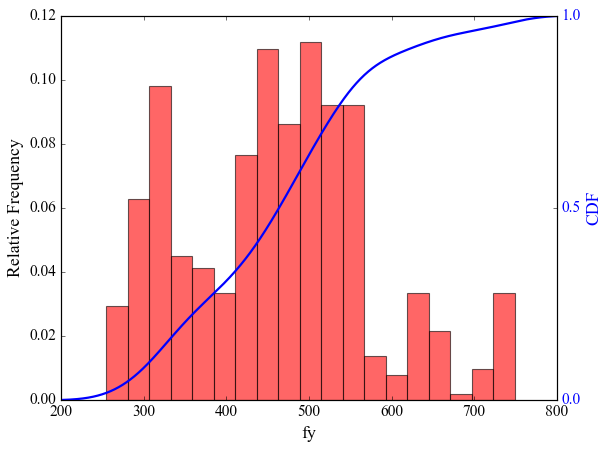

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 스타일 설정: 배경 흰색, 글꼴은 Times New Roman, 기본 폰트 크기 확대
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14

# 2. 데이터 불러오기: 엑셀 파일에서 "fy" 열의 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)
fy_data = data["fy"]  # 엑셀 파일에 "fy" 열이 있다고 가정합니다.

# 3. 히스토그램(상대빈도) 계산을 위한 가중치 설정
weights = np.ones_like(fy_data) / len(fy_data)

# 4. 히스토그램의 구간(bins) 설정
#    데이터의 최소값부터 최대값까지 20구간으로 나눕니다.
bin_min = fy_data.min()
bin_max = fy_data.max()
bins = np.linspace(bin_min, bin_max, 20)

# 5. x축 범위 설정: 데이터 범위에 5%의 여백 추가
margin = (bin_max - bin_min) * 0.05
x_min = 200
x_max = 800

# 히스토그램의 상대빈도 값을 미리 계산하여 왼쪽 y축 범위 설정
counts, _ = np.histogram(fy_data, bins=bins, weights=weights)
y1_min = 0
y1_max = 0.12

# 오른쪽 y축(CDF) 범위: 0 ~ 1
y2_min, y2_max = 0, 1

# 6. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 6-1. 왼쪽 y축: fy 데이터의 상대빈도를 히스토그램으로 표시
ax1.hist(
    fy_data,
    bins=bins,
    weights=weights,
    color="red",
    alpha=0.6,
    edgecolor="black",
    label="Relative Frequencies",
)
ax1.set_xlabel("fy", fontsize=16)
ax1.set_ylabel("Relative Frequency", fontsize=16)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y1_min, y1_max)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 6-2. 오른쪽 y축: 누적 KDE를 이용해 부드러운 CDF 곡선 그리기
# x축 범위 내에서 균등하게 샘플링한 그리드 생성
grid_x = np.linspace(x_min, x_max, 1000)
# gaussian_kde로 밀도 추정
kde = gaussian_kde(fy_data)
density = kde(grid_x)
# 사다리꼴 적분으로 누적합 계산 후 마지막 값으로 나눠 정규화 (마지막 값이 1이 됨)
cum = np.cumsum(density) * (grid_x[1] - grid_x[0])
cum = cum / cum[-1]

# 오른쪽 y축에 CDF 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(grid_x, cum, color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.set_ylim(y2_min, y2_max)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)
# CDF y축 눈금을 0, 0.5, 1로 표시
ax2.set_yticks(np.arange(0, 1.01, 0.5))

# 7. 그래프 제목 추가
plt.show()

#### 6. reinforcement_ratio

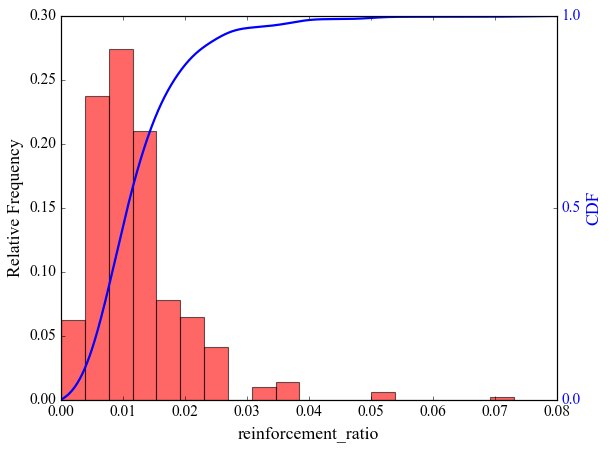

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 스타일 설정: 배경은 흰색, 글꼴은 Times New Roman, 기본 폰트 크기를 확대
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14

# 2. 데이터 불러오기: 엑셀 파일에서 "reinforcement_ratio" 열의 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)
reinforcement_data = data[
    "reinforcement_ratio"
]  # 엑셀 파일에 "reinforcement_ratio" 열이 있다고 가정

# 3. 히스토그램(상대빈도) 계산을 위한 가중치 설정
weights = np.ones_like(reinforcement_data) / len(reinforcement_data)

# 4. 히스토그램의 구간(bins) 설정
#    데이터의 최소값부터 최대값까지 20구간으로 나눕니다.
bin_min = reinforcement_data.min()
bin_max = reinforcement_data.max()
bins = np.linspace(bin_min, bin_max, 20)

# 5. x축 범위 설정: 데이터 범위에 약 5%의 여백을 추가
margin = (bin_max - bin_min) * 0.05
x_min = 0
x_max = 0.08

# 히스토그램의 상대빈도 값을 미리 계산하여 왼쪽 y축 범위를 설정
counts, _ = np.histogram(reinforcement_data, bins=bins, weights=weights)
y1_min = 0
y1_max = 0.3

# 오른쪽 y축 (CDF)의 범위: 0 ~ 1
y2_min, y2_max = 0, 1

# 6. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 6-1. 왼쪽 y축: 상대빈도 히스토그램 그리기
ax1.hist(
    reinforcement_data,
    bins=bins,
    weights=weights,
    color="red",
    alpha=0.6,
    edgecolor="black",
    label="Relative Frequencies",
)
ax1.set_xlabel("reinforcement_ratio", fontsize=16)
ax1.set_ylabel("Relative Frequency", fontsize=16)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y1_min, y1_max)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 6-2. 오른쪽 y축: 누적 KDE를 이용하여 부드러운 CDF 곡선 그리기
# x축 범위 내에서 균등하게 샘플링한 그리드 생성
grid_x = np.linspace(x_min, x_max, 1000)
# gaussian_kde를 이용해 밀도 추정
kde = gaussian_kde(reinforcement_data)
density = kde(grid_x)
# 사다리꼴 적분으로 누적합을 계산한 후, 마지막 값으로 나눠 정규화 (누적분포가 1이 됨)
cum = np.cumsum(density) * (grid_x[1] - grid_x[0])
cum = cum / cum[-1]

# 오른쪽 y축에 CDF 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(grid_x, cum, color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.set_ylim(y2_min, y2_max)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)
# 오른쪽 y축 눈금을 0, 0.5, 1로 설정
ax2.set_yticks(np.arange(0, 1.01, 0.5))

# 7. 그래프 제목 추가

plt.show()

#### 7. Pu

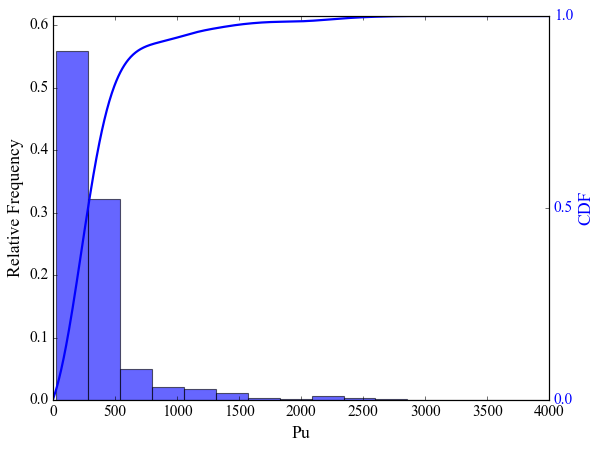

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 스타일 설정: 배경 흰색, 글꼴은 Times New Roman, 기본 폰트 크기 확대
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14

# 2. 데이터 불러오기: 엑셀 파일에서 "Pu" 열의 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)
pu_data = data["Pu"]  # 엑셀 파일에 "Pu" 열이 있다고 가정합니다.

# 3. 히스토그램(상대빈도) 계산을 위한 가중치 설정
weights = np.ones_like(pu_data) / len(pu_data)

# 4. 히스토그램의 구간(bins) 설정
#    데이터의 최소값부터 최대값까지 20구간으로 나눕니다.
bin_min = pu_data.min()
bin_max = pu_data.max()
bins = np.linspace(bin_min, bin_max, 20)

# 5. x축 범위 설정: 데이터 범위에 약 5%의 여백 추가
margin = (bin_max - bin_min) * 0.05
x_min = 0
x_max = 4000

# 히스토그램 상대빈도 계산 (왼쪽 y축 범위 설정용)
counts, _ = np.histogram(pu_data, bins=bins, weights=weights)
y1_min = 0
y1_max = counts.max() * 1.1  # 최대값에 10% 여유

# 오른쪽 y축 (CDF) 범위: 0 ~ 1
y2_min, y2_max = 0, 1

# 6. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 6-1. 왼쪽 y축: Pu 데이터의 상대빈도 히스토그램 그리기
ax1.hist(
    pu_data,
    bins=bins,
    weights=weights,
    color="blue",
    alpha=0.6,
    edgecolor="black",
    label="Relative Frequencies",
)
ax1.set_xlabel("Pu", fontsize=16)
ax1.set_ylabel("Relative Frequency", fontsize=16)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y1_min, y1_max)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 6-2. 오른쪽 y축: 누적 KDE를 이용해 부드러운 CDF 곡선 그리기
# x축 범위 내에서 균등하게 샘플링한 그리드 생성
grid_x = np.linspace(x_min, x_max, 1000)
# gaussian_kde로 밀도 추정
kde = gaussian_kde(pu_data)
density = kde(grid_x)
# 사다리꼴 적분으로 누적합 계산 후, 마지막 값으로 나눠 정규화 (마지막 값이 1이 됨)
cum = np.cumsum(density) * (grid_x[1] - grid_x[0])
cum = cum / cum[-1]

# 오른쪽 y축에 CDF 곡선 그리기
ax2 = ax1.twinx()
ax2.plot(grid_x, cum, color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.set_ylim(y2_min, y2_max)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)
# CDF y축 눈금을 0, 0.5, 1로 설정
ax2.set_yticks(np.arange(0, 1.01, 0.5))

# 7. 그래프 제목 추가

plt.show()

#### 8. FM

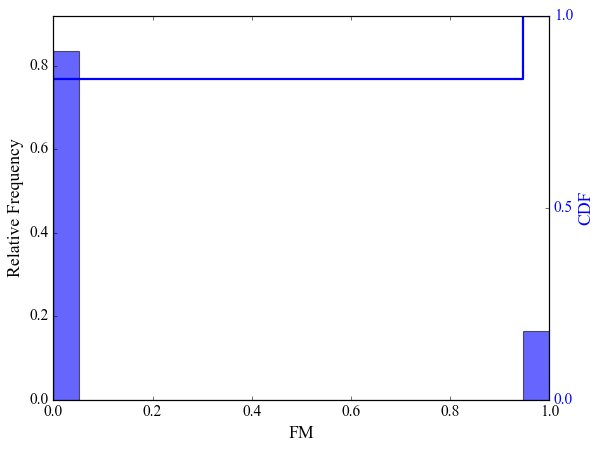

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 스타일 설정: 배경은 흰색, 글꼴은 Times New Roman, 기본 폰트 크기를 확대
plt.style.use("classic")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.size"] = 14

# 2. 데이터 불러오기: 엑셀 파일에서 "FM" 열의 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)
fm_data = data["FM"]  # 엑셀 파일에 "FM" 열이 있다고 가정합니다.

# 3. 히스토그램(상대빈도) 계산을 위한 가중치 설정
weights = np.ones_like(fm_data) / len(fm_data)

# 4. 히스토그램의 구간(bins) 설정
#    데이터의 최소값부터 최대값까지 20구간으로 나눕니다.
bin_min = fm_data.min()
bin_max = fm_data.max()
bins = np.linspace(bin_min, bin_max, 20)

# 5. x축 범위 설정: 여기서는 0부터 1로 고정 (원하는 범위로 설정)
x_min = 0
x_max = 1

# 히스토그램의 상대빈도 값을 미리 계산하여 왼쪽 y축 범위 설정
hist, bin_edges = np.histogram(fm_data, bins=bins, weights=weights)
y1_min = 0
y1_max = hist.max() * 1.1  # 최대값에 10% 여유

# 6. 히스토그램의 누적합(CDF) 계산
# hist 배열은 각 구간의 상대빈도를 나타내므로, np.cumsum(hist)로 누적합을 구합니다.
cdf_values = np.cumsum(hist)
# bin_edges의 길이는 len(hist)+1이므로, 시작값 0을 붙여서 CDF 배열 완성
cdf_values = np.concatenate(([0], cdf_values))
# (weights를 사용했으므로 마지막 값은 1입니다.)

# 7. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 7-1. 왼쪽 y축: FM 데이터의 상대빈도 히스토그램 그리기
ax1.hist(
    fm_data,
    bins=bins,
    weights=weights,
    color="blue",
    alpha=0.6,
    edgecolor="black",
    label="Relative Frequencies",
)
ax1.set_xlabel("FM", fontsize=16)
ax1.set_ylabel("Relative Frequency", fontsize=16)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y1_min, y1_max)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 7-2. 오른쪽 y축: 계산한 누적 상대빈도(CDF)를 계단형(step) 그래프로 그리기
# 여기서 where='pre' 옵션을 사용하면, 각 구간의 왼쪽 경계에서 값이 바뀌게 됩니다.
ax2 = ax1.twinx()
ax2.step(bin_edges, cdf_values, where="pre", color="blue", lw=2, label="CDF")
ax2.set_ylabel("CDF", color="blue", fontsize=16)
ax2.set_ylim(0, 1)
ax2.tick_params(axis="y", labelcolor="blue", labelsize=14)
# 오른쪽 y축 눈금을 0, 0.5, 1로 설정
ax2.set_yticks(np.arange(0, 1.01, 0.5))

# 8. 그래프 제목 추가
plt.show()

### Fig. 4. Correlation coefficients between input variables

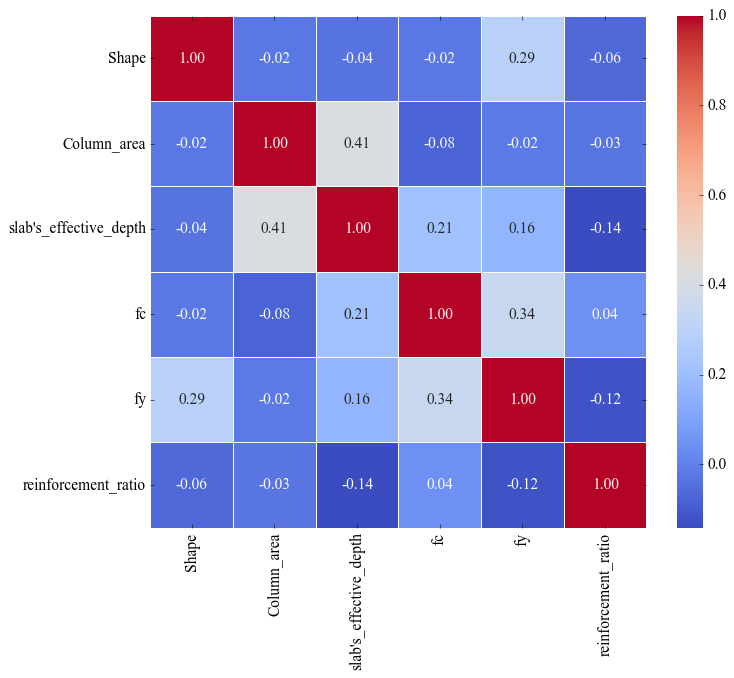

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 엑셀 파일 읽어오기 (파일 경로를 본인 환경에 맞게 수정)
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)

# 2. 상관계수를 계산할 열만 선택하기
cols = [
    "Shape",
    "Column_area",
    "slab's_effective_depth",
    "fc",
    "fy",
    "reinforcement_ratio",
]
data_selected = data[cols]

# 3. 상관계수 행렬 계산
corr_matrix = data_selected.corr()

# 4. 상관계수 행렬을 히트맵으로 표현하기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

### Table 3 Summary prediction results of resistance in training set and test set.

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 데이터 불러오기: 엑셀 파일에서 데이터를 읽어옵니다.
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)

# 2. 예측에 사용할 특징(Feature)와 타깃(Target) 변수 설정
features = [
    "Shape",
    "Column_area",
    "slab's_effective_depth",
    "fc",
    "fy",
    "reinforcement_ratio",
    "FM",
]
target = "Pu"

X = data[features]
y = data[target]

# 3. 학습 데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 모델 리스트 정의
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boost": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, objective="reg:squarederror"),
}

# 5. 각 모델별 평가 지표 계산 (Train/Test RMSE, MAE, R²)
results = []

for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측 수행
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 학습 데이터 평가 지표
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # 테스트 데이터 평가 지표
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # 결과 저장
    results.append(
        {
            "Model": name,
            "Train RMSE": rmse_train,
            "Train MAE": mae_train,
            "Train R²": r2_train,
            "Test RMSE": rmse_test,
            "Test MAE": mae_test,
            "Test R²": r2_test,
        }
    )

# 6. 결과를 DataFrame으로 정리하여 출력
results_df = pd.DataFrame(results)
print(results_df)

               Model  Train RMSE   Train MAE  Train R²   Test RMSE  \
0  Linear Regression  152.815202  102.432926  0.860388  134.198110   
1      Decision Tree   14.903160    1.659314  0.998672  144.137224   
2                SVR  412.080343  186.017325 -0.015206  375.466141   
3      Random Forest   75.447341   23.202589  0.965969   84.920622   
4           AdaBoost   93.239931   73.350556  0.948025  122.237259   
5     Gradient Boost   37.557165   25.417137  0.991567  106.593363   
6            XGBoost   15.059650    3.123513  0.998644  151.819093   

     Test MAE   Test R²  
0  106.566748  0.872936  
1   69.088235  0.853417  
2  179.095307  0.005345  
3   49.120248  0.949119  
4   88.916957  0.894576  
5   55.291616  0.919834  
6   60.709904  0.837376  


### Fig.6. Prediction results of resistance in training set

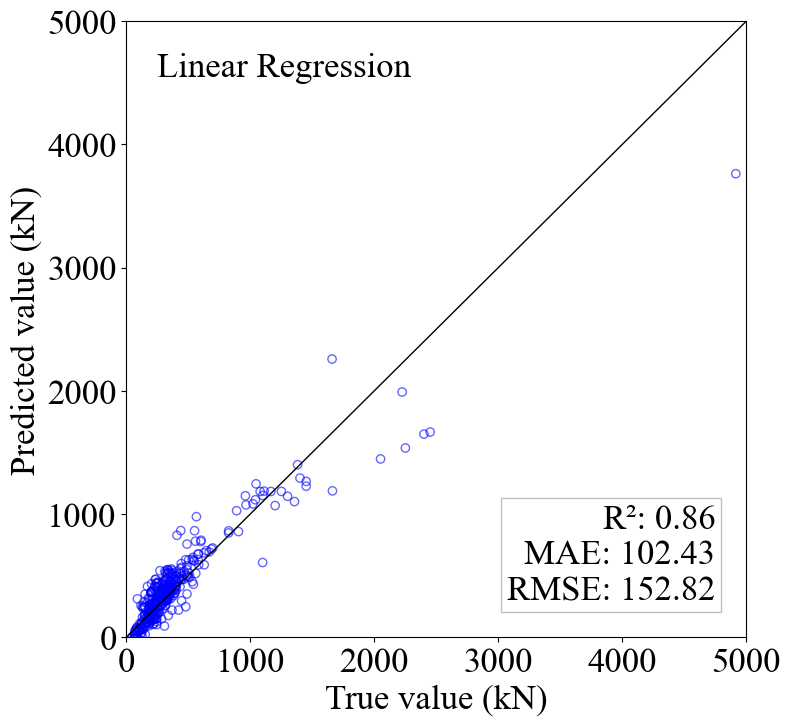

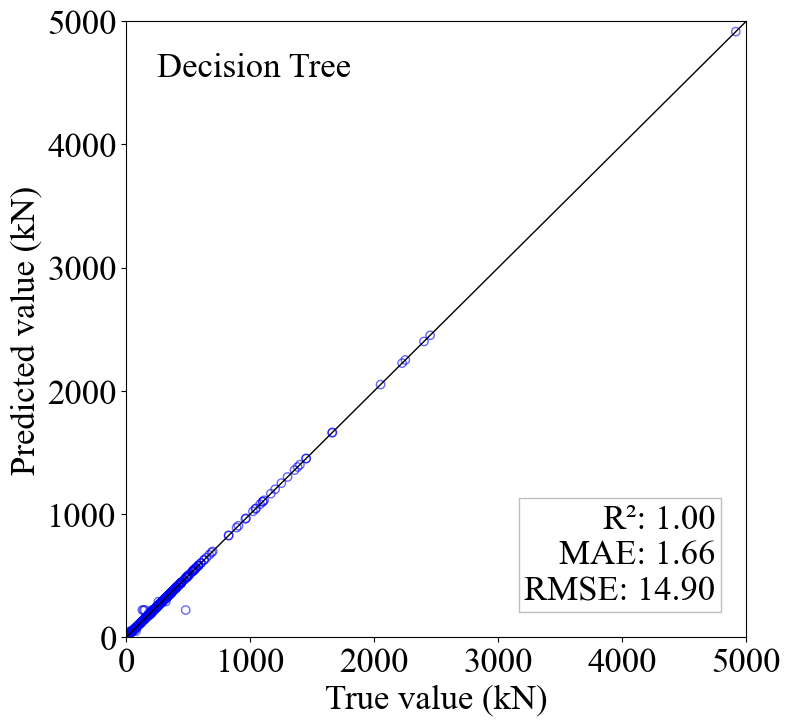

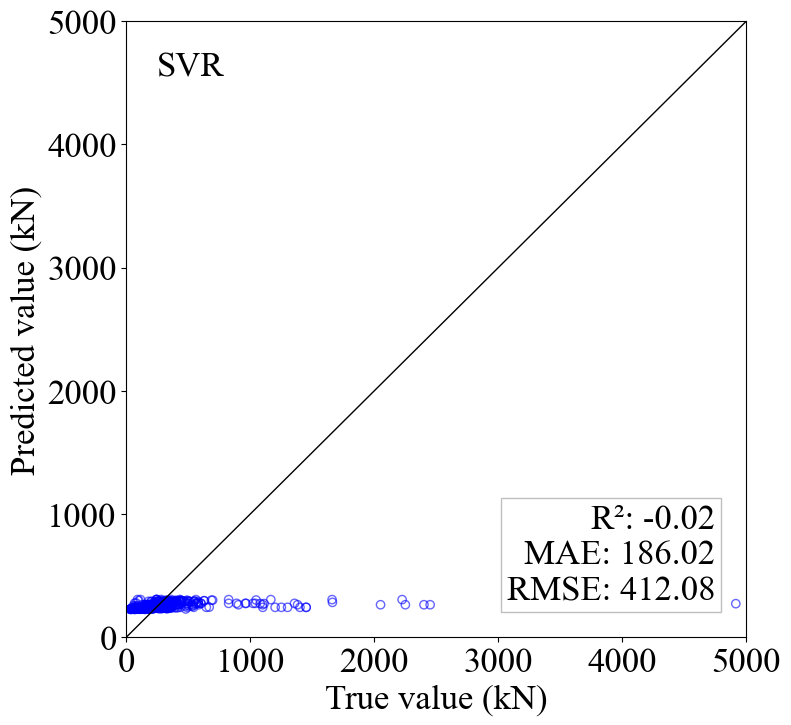

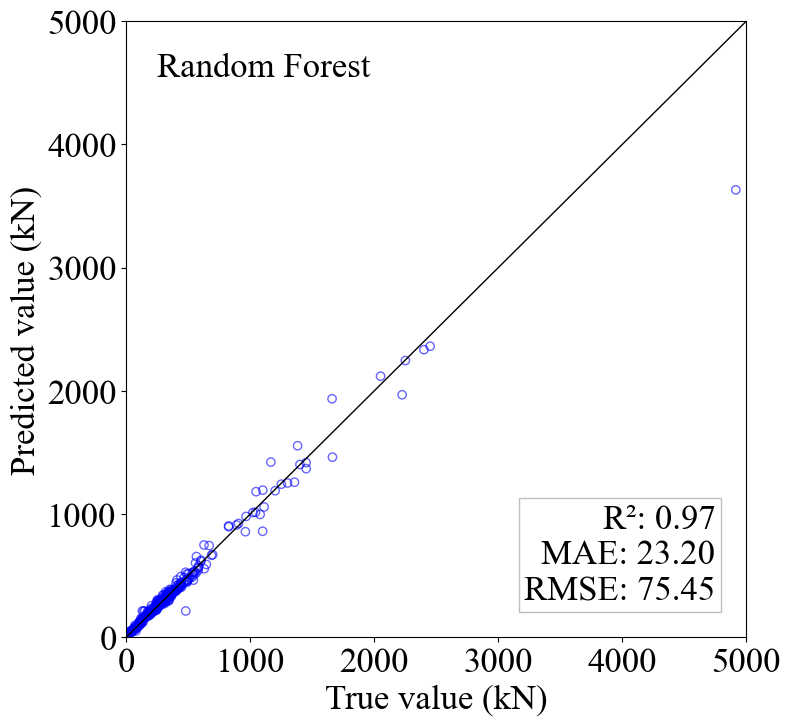

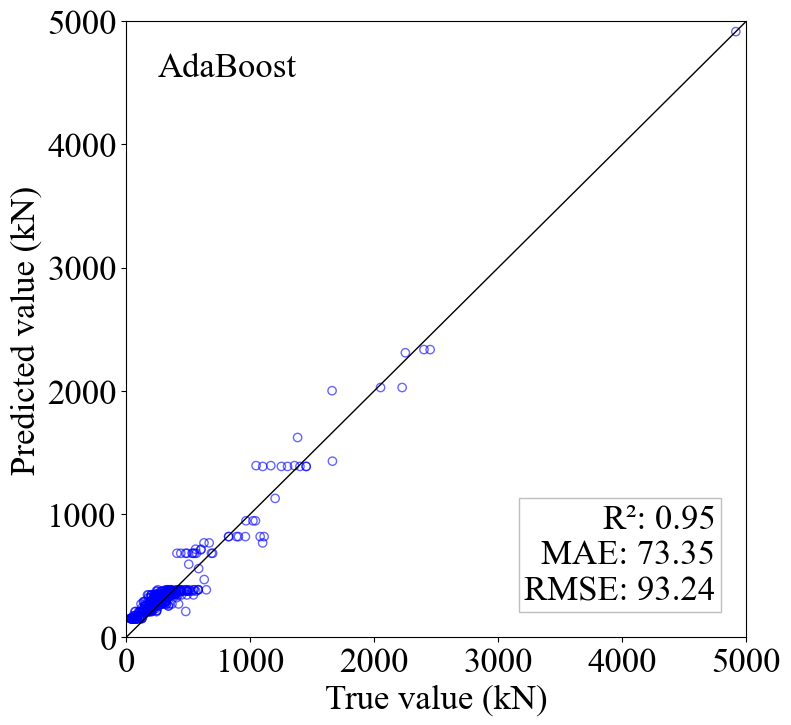

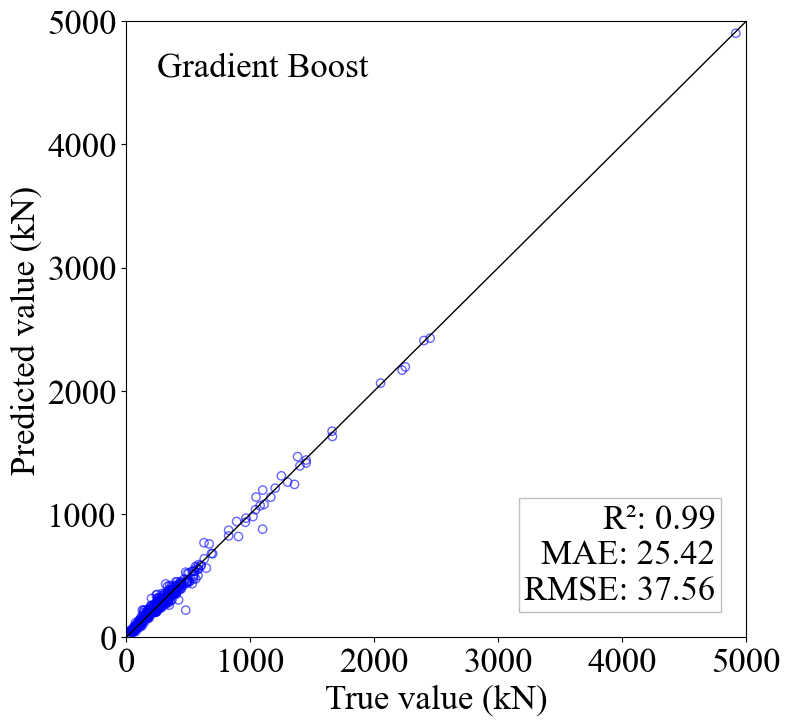

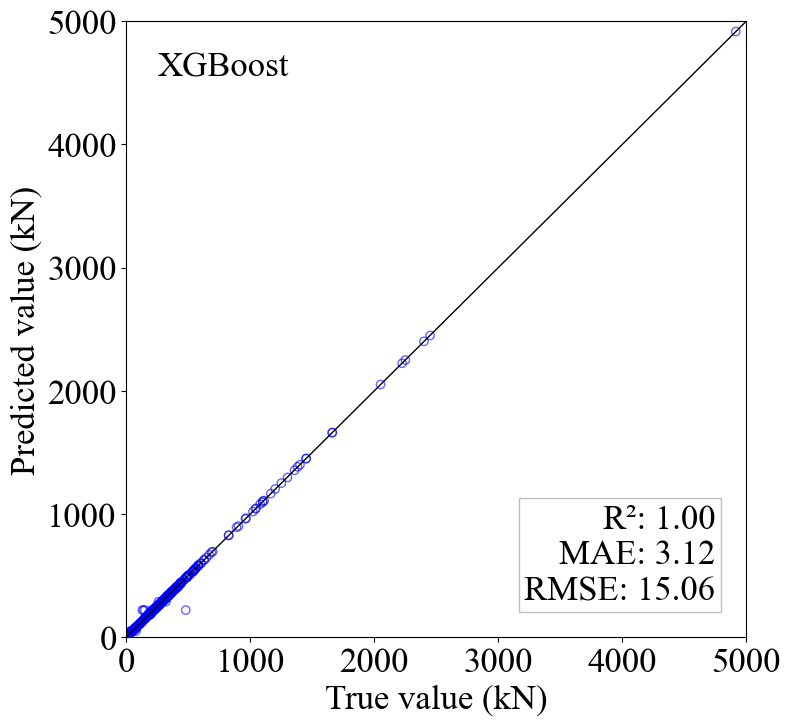

In [25]:
import matplotlib.pyplot as plt

plt.style.use("default")

# 전체 폰트 설정: Times New Roman, 14포인트
font_size = 25
plt.rc("font", family="Times New Roman", size=font_size)

# 각 모델에 대해 1:1 비교 그래프 그리기
for name, model in models.items():
    # 학습 데이터에 대한 예측 수행
    y_train_pred = model.predict(X_train)

    # 평가 지표 계산 (학습 데이터)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # 산점도 및 1:1 선 그리기
    plt.figure(figsize=(8, 8))
    # 파란색 비어있는 동그라미로 표시
    plt.scatter(
        y_train,
        y_train_pred,
        alpha=0.6,
        marker="o",
        facecolors="none",
        edgecolors="blue",
    )

    # 1:1 비교 선 (대각선)
    min_val = 0
    max_val = 5000
    plt.plot([min_val, max_val], [min_val, max_val], "black", lw=1)

    plt.xlabel("True value (kN)")
    plt.ylabel("Predicted value (kN)")

    # x축과 y축 범위를 0에서 5000으로 설정
    plt.xlim(0, 5000)
    plt.ylim(0, 5000)

    # 왼쪽 상단에 모델 이름 표기 (axes 좌표: 0~1)
    plt.text(
        0.05,
        0.95,
        name,
        transform=plt.gca().transAxes,
        fontsize=font_size,
        verticalalignment="top",
    )

    # 오른쪽 하단에 평가 지표 표기
    metrics_text = f"R²: {r2_train:.2f}\nMAE: {mae_train:.2f}\nRMSE: {rmse_train:.2f}"
    plt.text(
        0.95,
        0.05,
        metrics_text,
        transform=plt.gca().transAxes,
        fontsize=font_size,
        verticalalignment="bottom",
        horizontalalignment="right",
        bbox=dict(facecolor="white", alpha=0.5, edgecolor="gray"),
    )

    plt.show()

### Fig.7. Prediction results of resistance in test set.

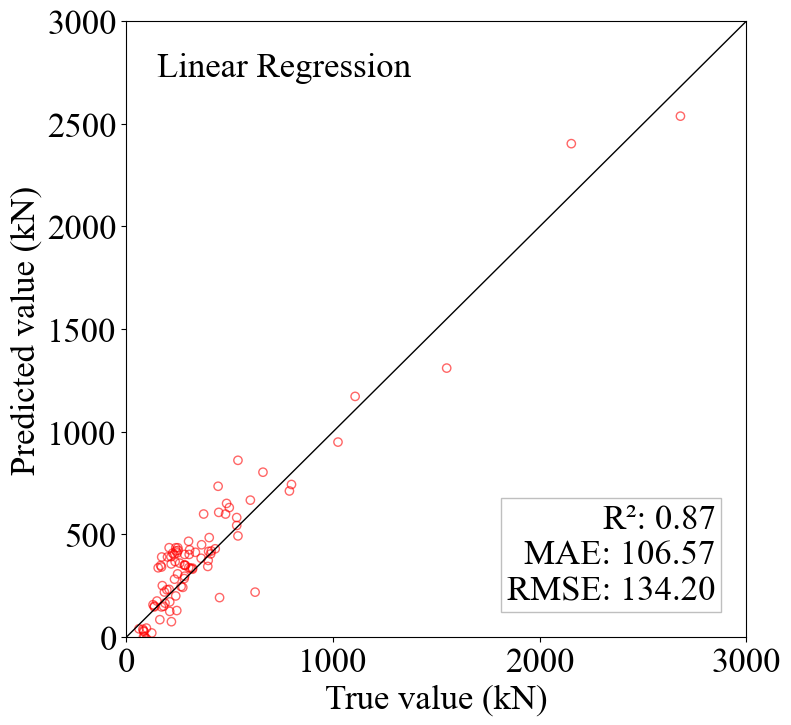

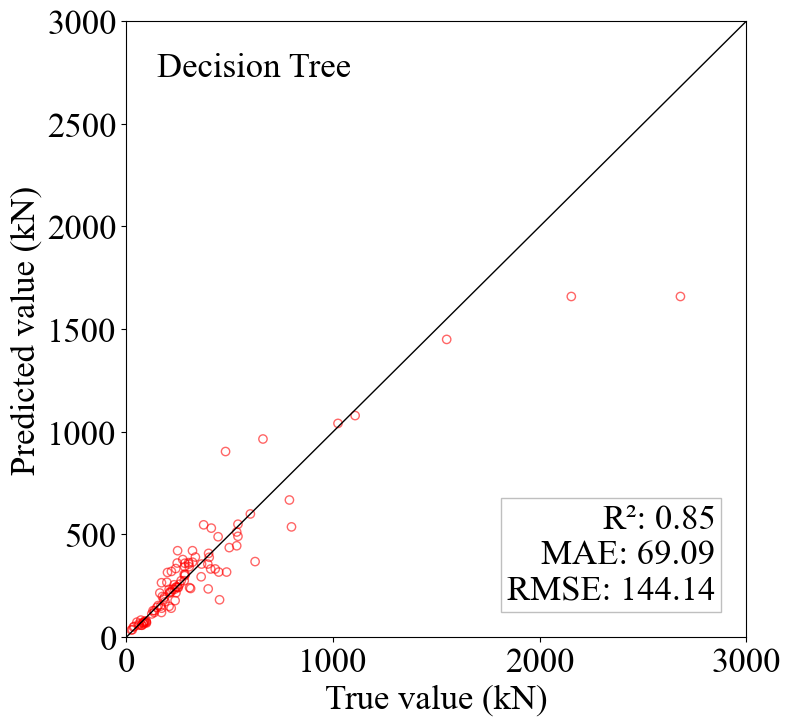

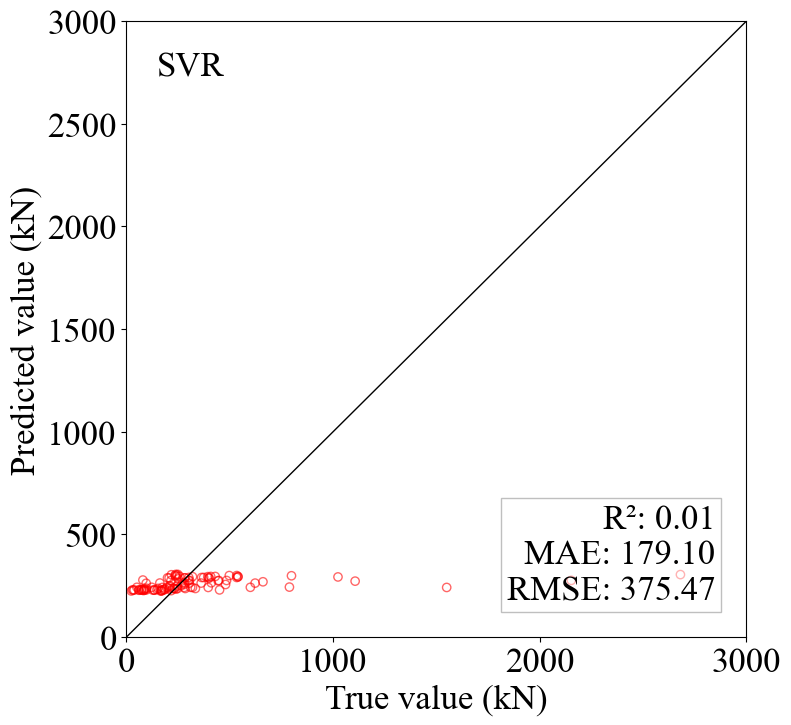

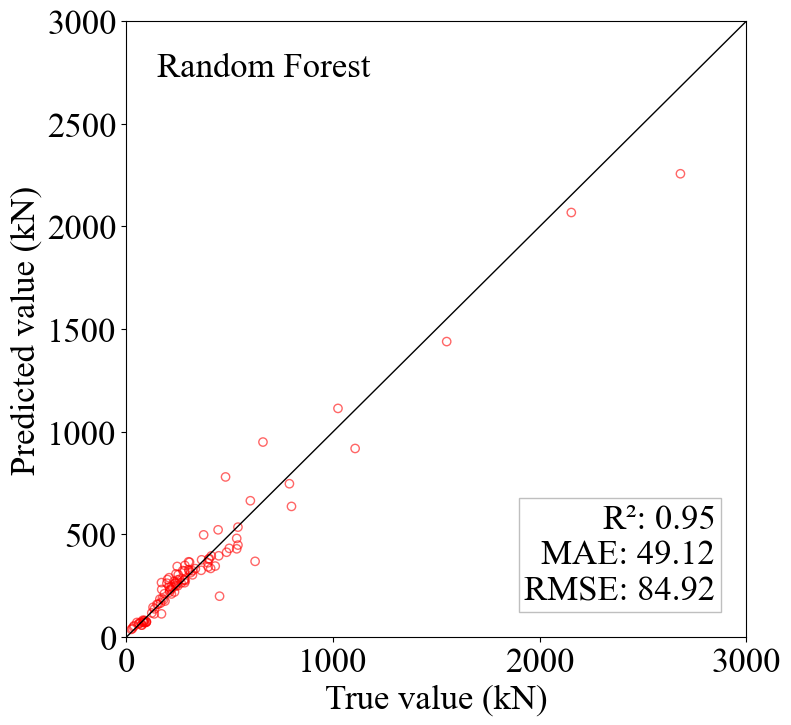

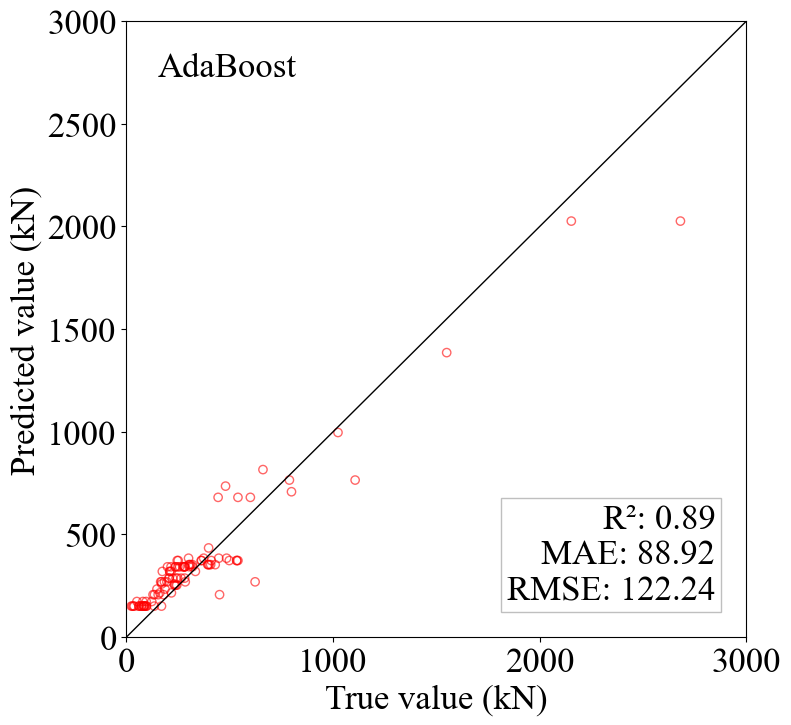

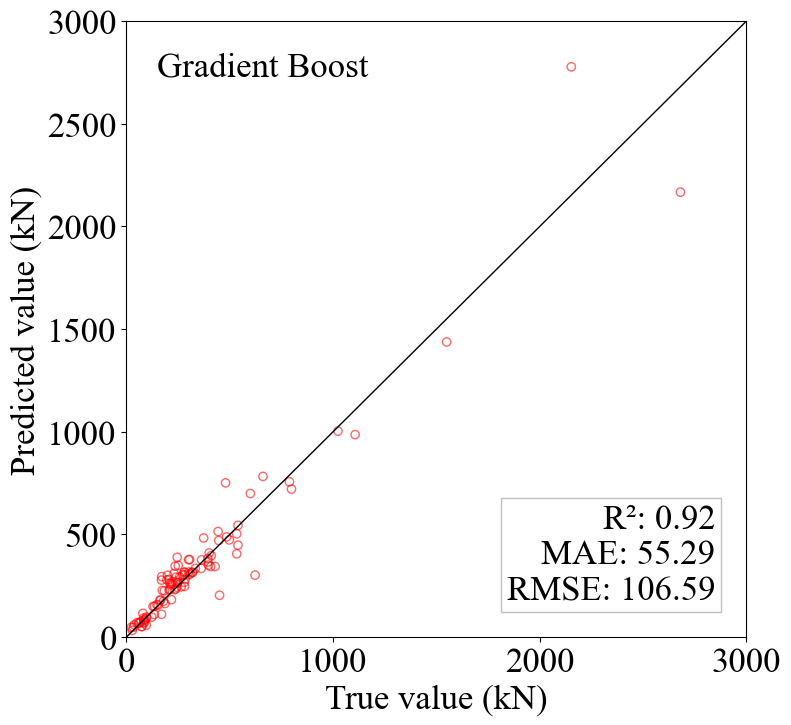

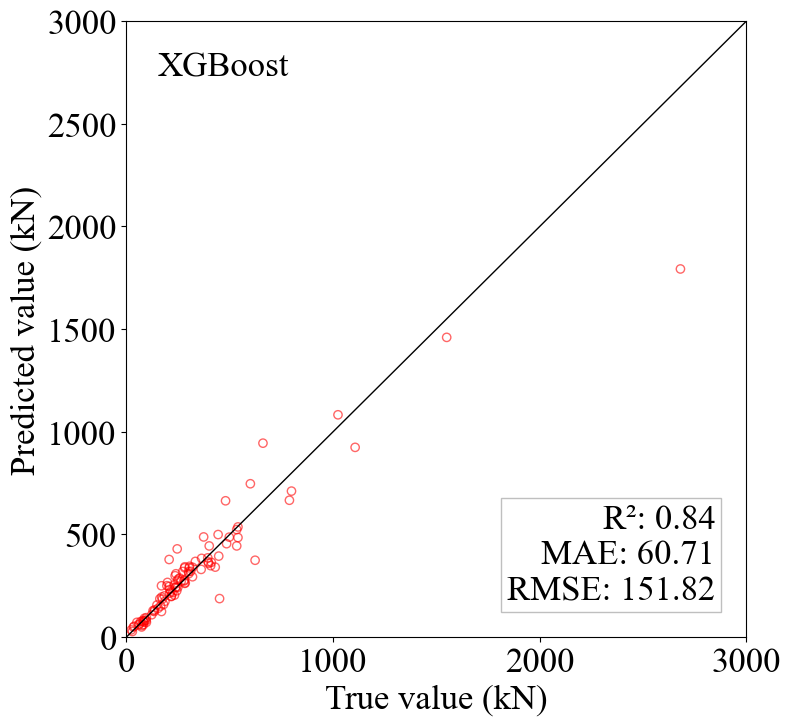

In [26]:
import matplotlib.pyplot as plt

plt.style.use("default")

# 전체 폰트 설정: Times New Roman, 14포인트
font_size = 25
plt.rc("font", family="Times New Roman", size=font_size)

# 각 모델에 대해 1:1 비교 그래프 그리기 (테스트 데이터)
for name, model in models.items():
    # 테스트 데이터에 대한 예측 수행
    y_test_pred = model.predict(X_test)

    # 평가 지표 계산 (테스트 데이터)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # 산점도 및 1:1 선 그리기
    plt.figure(figsize=(8, 8))
    # 빨간색 비어있는 동그라미로 표시
    plt.scatter(
        y_test, y_test_pred, alpha=0.6, marker="o", facecolors="none", edgecolors="red"
    )

    # 1:1 비교 선 (대각선)
    min_val = 0
    max_val = 3000
    plt.plot([min_val, max_val], [min_val, max_val], "black", lw=1)

    plt.xlabel("True value (kN)")
    plt.ylabel("Predicted value (kN)")

    # x축과 y축 범위를 0에서 5000으로 설정
    plt.xlim(0, 3000)
    plt.ylim(0, 3000)

    # 왼쪽 상단에 모델 이름 표기 (axes 좌표: 0~1)
    plt.text(
        0.05,
        0.95,
        name,
        transform=plt.gca().transAxes,
        fontsize=font_size,
        verticalalignment="top",
    )

    # 오른쪽 하단에 평가 지표 표기
    metrics_text = f"R²: {r2_test:.2f}\nMAE: {mae_test:.2f}\nRMSE: {rmse_test:.2f}"
    plt.text(
        0.95,
        0.05,
        metrics_text,
        transform=plt.gca().transAxes,
        fontsize=font_size,
        verticalalignment="bottom",
        horizontalalignment="right",
        bbox=dict(facecolor="white", alpha=0.5, edgecolor="gray"),
    )

    plt.show()

### Table 7 Summary prediction results of failure mode in training set and test set.

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 분류 모델 관련 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
import xgboost as xgb

# 분류 성능 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. 데이터 불러오기
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)

# 2. 예측에 사용할 특징(Features)와 타깃(Target) 변수 설정
features = [
    "Shape",
    "Column_area",
    "slab's_effective_depth",
    "fc",
    "fy",
    "reinforcement_ratio",
]
target = "FM"

X = data[features]
y = data[target]

# (선택) 만약 y가 문자열이라면 숫자로 변환(라벨 인코딩)
# 예: "Punching", "Flexural" 등이 있는 경우
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

# 3. Train/Test 분할 (80%: Train, 20%: Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 모델 리스트 정의 (원래 예시의 회귀 모델을 분류 모델로 교체)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),  # SVC: Support Vector Classifier
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(
        random_state=42, eval_metric="mlogloss"  # 다중분류/이진분류 시 사용
    ),
}

# 5. 각 모델별 평가 지표 계산 (Train/Test Precision, Recall, F1, Accuracy)
results = []

for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 수행
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # (1) Train 데이터 성능
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(
        y_train, y_train_pred, average="macro", zero_division=0
    )
    train_recall = recall_score(y_train, y_train_pred, average="macro")
    train_f1 = f1_score(y_train, y_train_pred, average="macro")

    # (2) Test 데이터 성능
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average="macro", zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average="macro")
    test_f1 = f1_score(y_test, y_test_pred, average="macro")

    # 결과 저장
    results.append(
        {
            "Model": name,
            "Train Precision": train_prec,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train Accuracy": train_acc,
            "Test Precision": test_prec,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test Accuracy": test_acc,
        }
    )

# 6. 결과를 DataFrame으로 정리하여 출력
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Precision  Train Recall  Train F1  \
0  Logistic Regression         0.848393      0.575613  0.590920   
1        Decision Tree         1.000000      1.000000  1.000000   
2                  SVM         0.414216      0.500000  0.453083   
3        Random Forest         1.000000      1.000000  1.000000   
4             AdaBoost         0.889946      0.742604  0.789853   
5       Gradient Boost         0.985114      0.962806  0.973529   
6              XGBoost         0.998525      0.992857  0.995664   

   Train Accuracy  Test Precision  Test Recall   Test F1  Test Accuracy  
0        0.850490        0.685000     0.530032  0.525266       0.862745  
1        1.000000        0.710227     0.710227  0.710227       0.862745  
2        0.828431        0.431373     0.500000  0.463158       0.862745  
3        1.000000        0.779720     0.727273  0.749274       0.892157  
4        0.901961        0.963158     0.750000  0.814208       0.931373  
5        0.985294  

### Fig.9. Confusion matrices of ML models in training set.

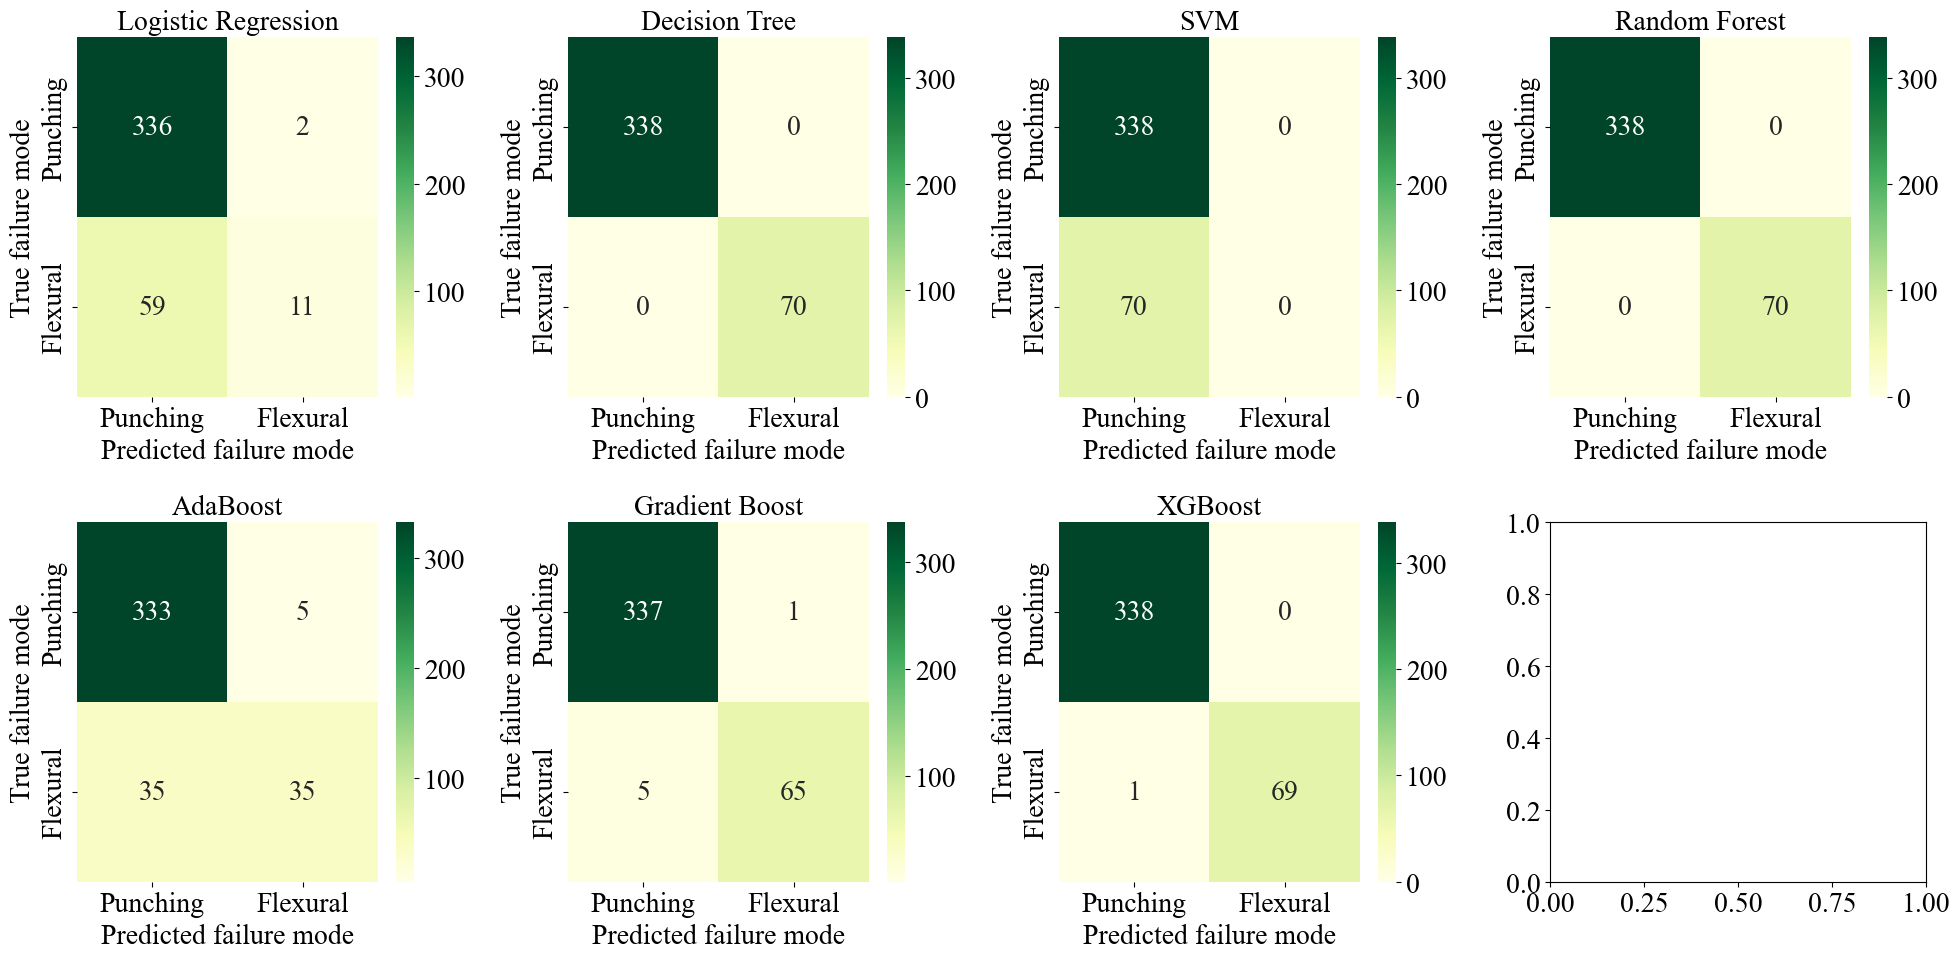


[트레인 데이터 성능 지표 요약]
                 Model  Train Precision  Train Recall  Train F1  \
0  Logistic Regression         0.848393      0.575613  0.590920   
1        Decision Tree         1.000000      1.000000  1.000000   
2                  SVM         0.414216      0.500000  0.453083   
3        Random Forest         1.000000      1.000000  1.000000   
4             AdaBoost         0.889946      0.742604  0.789853   
5       Gradient Boost         0.985114      0.962806  0.973529   
6              XGBoost         0.998525      0.992857  0.995664   

   Train Accuracy  
0        0.850490  
1        1.000000  
2        0.828431  
3        1.000000  
4        0.901961  
5        0.985294  
6        0.997549  


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 분류 모델 관련 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
import xgboost as xgb

# 분류 성능 지표, 혼동 행렬
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)

# 2. 예측에 사용할 특징(Features)와 타깃(Target) 변수 설정
features = [
    "Shape",
    "Column_area",
    "slab's_effective_depth",
    "fc",
    "fy",
    "reinforcement_ratio",
]
target = "FM"

# 폰트 사이즈를 20으로 설정
font_size = 20

X = data[features]
y = data[target]

# (선택) y가 문자열인 경우 필요한 경우 라벨 인코딩 수행
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

# 3. Train/Test 분할 (여기서는 트레인 데이터를 기준으로 사용)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 모델 리스트 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric="mlogloss"),
}

# 전역 폰트 설정 (Times New Roman, 폰트 사이즈 20)
plt.rc("font", family="Times New Roman", size=font_size)

# 혼동 행렬에 사용할 클래스 레이블 매핑 (0 -> Punching, 1 -> Flexural)
label_mapping = {0: "Punching", 1: "Flexural"}

# ----------------------------------------------------------------------
# 모델 학습 및 혼동 행렬 시각화 (트레인 데이터 기준)
# ----------------------------------------------------------------------
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2행 4열 서브플롯
axes = axes.ravel()  # 1차원 배열로 변환

for i, (name, model) in enumerate(models.items()):
    # 모델 학습
    model.fit(X_train, y_train)
    # 트레인 데이터 예측
    y_train_pred = model.predict(X_train)

    # 혼동 행렬 계산 (트레인 데이터 기준)
    cm = confusion_matrix(y_train, y_train_pred)

    # 히트맵 시각화
    sns.heatmap(
        cm,
        annot=True,  # 셀 안에 숫자 표시
        fmt="d",  # 정수 형태로 표시
        cmap="YlGn",  # 색상 맵 (원하는 경우 'Reds'나 'Blues' 등으로 변경 가능)
        cbar=True,
        ax=axes[i],
    )

    # 축 라벨 설정: 모델이 인식한 클래스 순서(model.classes_)
    if hasattr(model, "classes_"):
        classes_ = model.classes_
        # 매핑된 레이블 생성 (예: 0 -> "Punching", 1 -> "Flexural")
        mapped_labels = [label_mapping.get(c, c) for c in classes_]
        # x축: 가로로 표시 (회전 0도), y축: 세로로 표시 (회전 90도)
        axes[i].set_xticklabels(mapped_labels, rotation=0, ha="center", fontsize=font_size)
        axes[i].set_yticklabels(mapped_labels, rotation=90, fontsize=font_size)
    axes[i].set_title(name, fontsize=font_size)
    axes[i].set_xlabel("Predicted failure mode", fontsize=font_size)
    axes[i].set_ylabel("True failure mode", fontsize=font_size)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 트레인 데이터 성능 지표 (Precision, Recall, F1, Accuracy) 계산
# ----------------------------------------------------------------------
results = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)

    # 트레인 데이터 성능 지표 계산
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average="macro", zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, average="macro")
    train_f1 = f1_score(y_train, y_train_pred, average="macro")

    results.append(
        {
            "Model": name,
            "Train Precision": train_prec,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train Accuracy": train_acc,
        }
    )

results_df = pd.DataFrame(results)
print("\n[트레인 데이터 성능 지표 요약]")
print(results_df)


### Fig.10. Confusion matrices of ML models in test set.

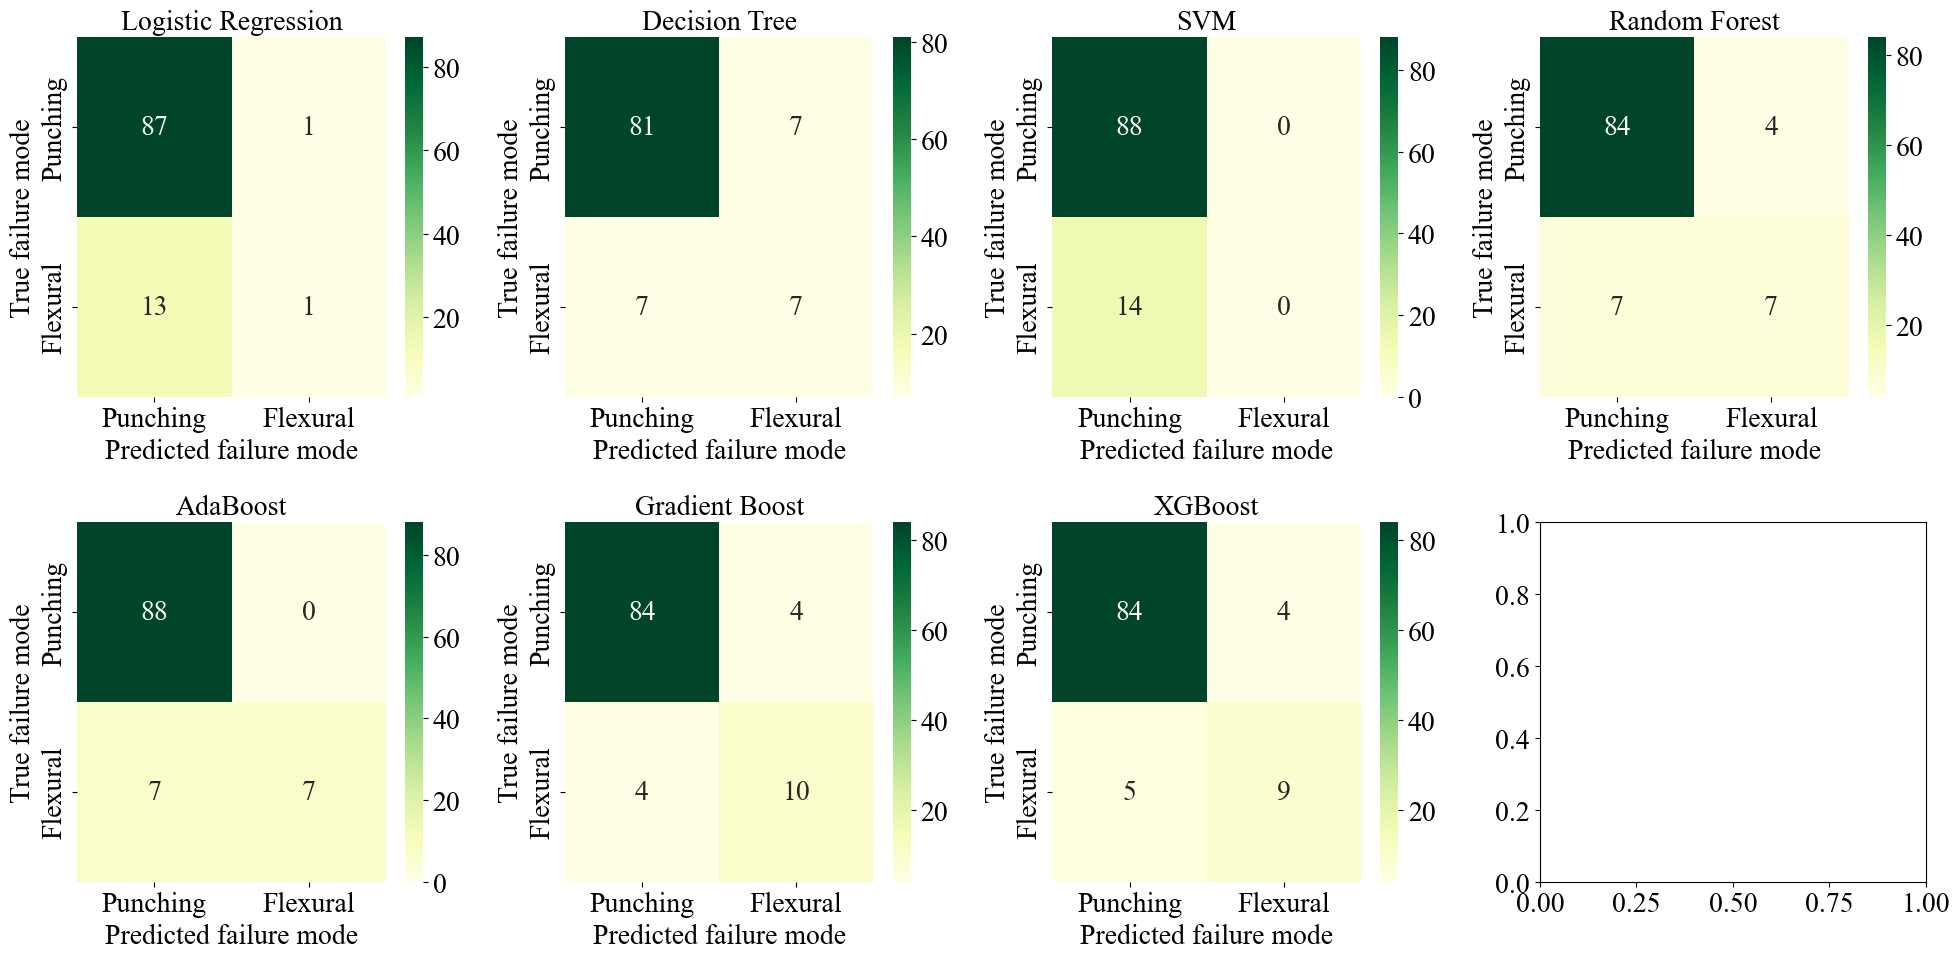


[테스트 데이터 성능 지표 요약]
                 Model  Test Precision  Test Recall   Test F1  Test Accuracy
0  Logistic Regression        0.685000     0.530032  0.525266       0.862745
1        Decision Tree        0.710227     0.710227  0.710227       0.862745
2                  SVM        0.431373     0.500000  0.463158       0.862745
3        Random Forest        0.779720     0.727273  0.749274       0.892157
4             AdaBoost        0.963158     0.750000  0.814208       0.931373
5       Gradient Boost        0.834416     0.834416  0.834416       0.921569
6              XGBoost        0.818064     0.798701  0.807910       0.911765


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 분류 모델 관련 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
import xgboost as xgb

# 분류 성능 지표, 혼동 행렬
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
file_path = "../데이터 베이스/머신러닝 데이터.xlsx"
data = pd.read_excel(file_path)

# 2. 예측에 사용할 특징(Features)와 타깃(Target) 변수 설정
features = [
    "Shape",
    "Column_area",
    "slab's_effective_depth",
    "fc",
    "fy",
    "reinforcement_ratio",
]
target = "FM"

# 폰트 사이즈를 20으로 설정
font_size = 20

X = data[features]
y = data[target]

# (선택) y가 문자열인 경우 필요한 경우 라벨 인코딩 수행
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

# 3. Train/Test 분할 (여기서는 테스트 데이터를 기준으로 사용)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 모델 리스트 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric="mlogloss"),
}

# 전역 폰트 설정 (Times New Roman, 폰트 사이즈 20)
plt.rc("font", family="Times New Roman", size=font_size)

# 혼동 행렬에 사용할 클래스 레이블 매핑 (0 -> Punching, 1 -> Flexural)
label_mapping = {0: "Punching", 1: "Flexural"}

# ----------------------------------------------------------------------
# 모델 학습 후 테스트 데이터 기준 혼동 행렬 시각화
# ----------------------------------------------------------------------
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2행 4열 서브플롯
axes = axes.ravel()  # 1차원 배열로 변환

for i, (name, model) in enumerate(models.items()):
    # 모델은 트레인 데이터로 학습
    model.fit(X_train, y_train)
    # 테스트 데이터에 대해 예측 수행
    y_test_pred = model.predict(X_test)

    # 혼동 행렬 계산 (테스트 데이터 기준)
    cm = confusion_matrix(y_test, y_test_pred)

    # 히트맵 시각화
    sns.heatmap(
        cm,
        annot=True,      # 셀 안에 숫자 표시
        fmt="d",         # 정수 형태로 표시
        cmap="YlGn",     # 색상 맵
        cbar=True,
        ax=axes[i],
    )

    # 축 라벨 설정: 모델이 인식한 클래스 순서(model.classes_)
    if hasattr(model, "classes_"):
        classes_ = model.classes_
        # 매핑된 레이블 생성 (예: 0 -> "Punching", 1 -> "Flexural")
        mapped_labels = [label_mapping.get(c, c) for c in classes_]
        # x축: 가로 방향(회전 0도), y축: 세로 방향(회전 90도)
        axes[i].set_xticklabels(mapped_labels, rotation=0, ha="center", fontsize=font_size)
        axes[i].set_yticklabels(mapped_labels, rotation=90, fontsize=font_size)
    axes[i].set_title(name, fontsize=font_size)
    axes[i].set_xlabel("Predicted failure mode", fontsize=font_size)
    axes[i].set_ylabel("True failure mode", fontsize=font_size)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 테스트 데이터 성능 지표 (Precision, Recall, F1, Accuracy) 계산
# ----------------------------------------------------------------------
results_test = []

for name, model in models.items():
    # 테스트 데이터에 대해 예측 수행
    y_test_pred = model.predict(X_test)

    # 테스트 데이터 성능 지표 계산
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average="macro", zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average="macro")
    test_f1 = f1_score(y_test, y_test_pred, average="macro")

    results_test.append(
        {
            "Model": name,
            "Test Precision": test_prec,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test Accuracy": test_acc,
        }
    )

results_test_df = pd.DataFrame(results_test)
print("\n[테스트 데이터 성능 지표 요약]")
print(results_test_df)


### Fig.13. Global interpretations for punching shear resistance.

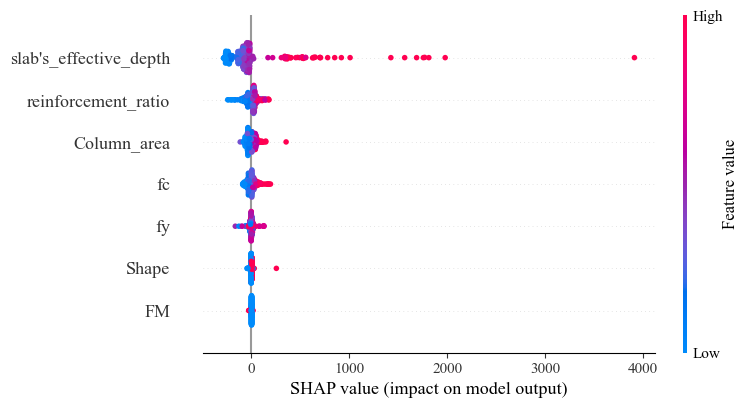

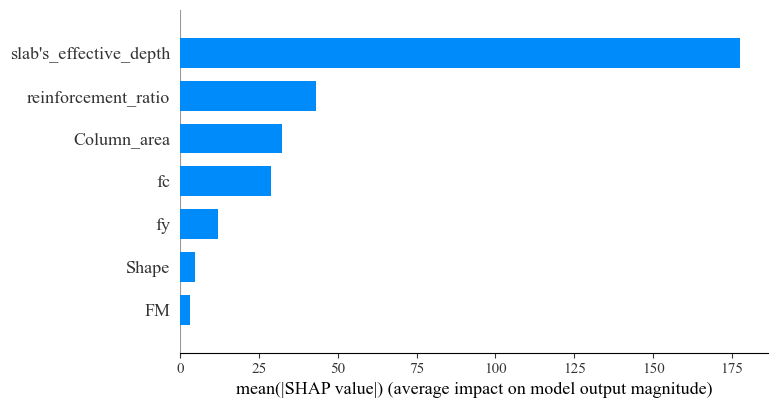

In [49]:
import shap
import matplotlib.pyplot as plt

# matplotlib 스타일 및 폰트 설정 (Times New Roman, 14포인트)
plt.style.use("default")
plt.rc("font", family="Times New Roman", size=14)

# XGBoost 모델 선택 (models 딕셔너리에서 "XGBoost" 키 사용)
xgb_model = models["XGBoost"]

# XGBoost는 트리 기반 모델이므로 TreeExplainer 사용
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# 1. SHAP Beeswarm Plot (개별 샘플별 SHAP 값 분포)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type="dot", show=False)
plt.show()

# 2. Mean |SHAP Value| (특징별 평균 절대 SHAP 값, 즉 중요도)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.show()


### Fig.16. Global interpretations for failure modes.

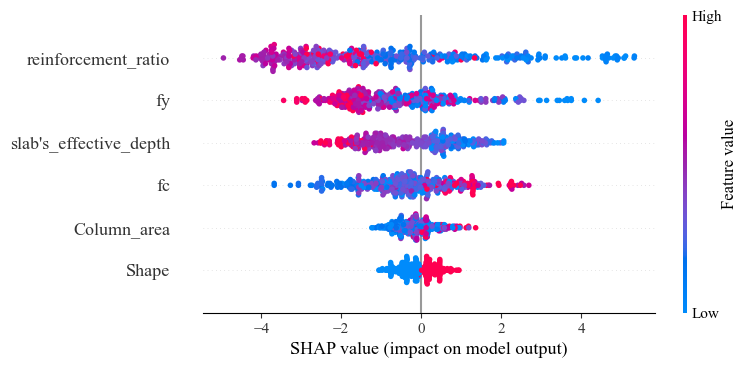

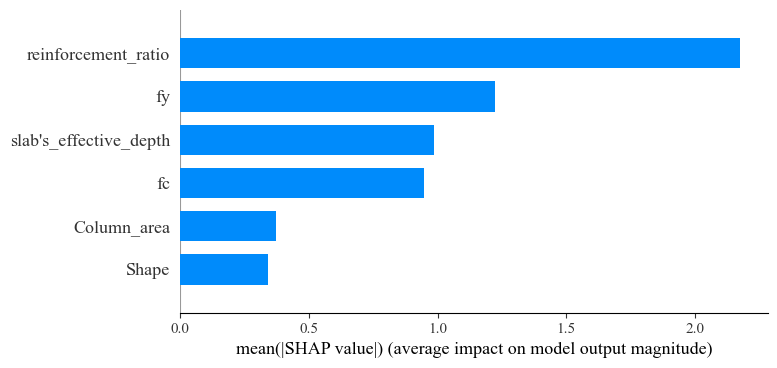

In [51]:
import shap
import matplotlib.pyplot as plt

# matplotlib 스타일 및 폰트 설정 (Times New Roman, 14포인트)
plt.style.use("default")
plt.rc("font", family="Times New Roman", size=14)

# models 딕셔너리에서 XGBoost 분류 모델 선택
xgb_model = models["XGBoost"]

# XGBoost는 트리 기반 모델이므로 TreeExplainer 사용
explainer = shap.TreeExplainer(xgb_model)

# 분류 문제의 경우, shap_values가 클래스별 리스트 형태로 반환될 수 있습니다.
# 여기서는 예시로 첫 번째 클래스(인덱스 0)의 SHAP 값을 선택합니다.
shap_values = explainer.shap_values(X_train)
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[0]
else:
    shap_values_to_plot = shap_values

# 1. SHAP Beeswarm Plot (각 샘플별 SHAP 값 분포)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_to_plot, X_train, plot_type="dot", show=False)
plt.show()

# 2. Mean |SHAP Value| Bar Plot (특징별 평균 절대 SHAP 값)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_to_plot, X_train, plot_type="bar", show=False)
plt.show()
